In [2]:
import pandas as pd
medals = pd.read_excel('https://raw.githubusercontent.com/wtitze/3E/main/Medals.xlsx')
medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [4]:
medals = medals.drop(medals.iloc[:,-2:],1)
medals= medals.drop(columns='Rank')
medals = medals.rename(columns={'Team/NOC':'Team'})

In [5]:
medals[medals['Team']=='Italy']['Gold']

9    10
Name: Gold, dtype: int64

<BarContainer object of 3 artists>

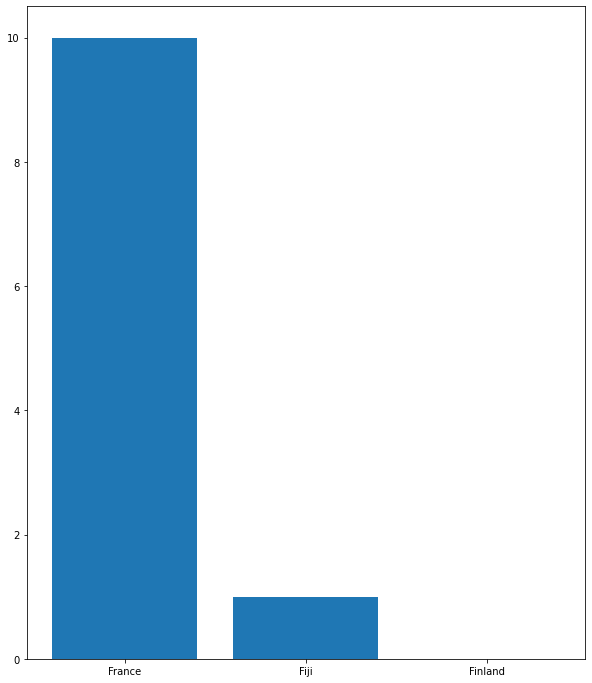

In [6]:
import matplotlib.pyplot as plt 
# creazione ascisse x,y
datax = medals[medals['Team'].str.startswith('F')]['Team'].tolist()
datay = medals[medals['Team'].str.startswith('F')]['Gold'].tolist()
#creazione figura senza dati
fig = plt.figure(figsize=(10,12))
ax = plt.axes()

plt.rcParams.update({'font.size': 15}) # font size

ax.bar(datax,datay)

In [7]:
medals['Totale'] = medals['Gold'] + medals['Silver'] + medals['Bronze']

In [27]:
medals

,Team,Gold,Silver,Bronze,Totale
0,United States of America,39,41,33,113
1,People's Republic of China,38,32,18,88
2,Japan,27,14,17,58
3,Great Britain,22,21,22,65
4,ROC,20,28,23,71
...,...,...,...,...,...
88,Ghana,0,0,1,1
89,Grenada,0,0,1,1
90,Kuwait,0,0,1,1
91,Republic of Moldova,0,0,1,1


In [31]:
medals[medals['Totale']==medals['Totale'].max()][['Team','Totale']]

,Team,Totale
0,United States of America,113


In [35]:
medals['Totale'].sum()

1080

In [37]:
medals['Percentuale'] = medals['Totale']*100/medals['Totale'].sum()
medals

,Team,Gold,Silver,Bronze,Totale,Percentuale
0,United States of America,39,41,33,113,10.462963
1,People's Republic of China,38,32,18,88,8.148148
2,Japan,27,14,17,58,5.370370
3,Great Britain,22,21,22,65,6.018519
4,ROC,20,28,23,71,6.574074
...,...,...,...,...,...,...
88,Ghana,0,0,1,1,0.092593
89,Grenada,0,0,1,1,0.092593
90,Kuwait,0,0,1,1,0.092593
91,Republic of Moldova,0,0,1,1,0.092593


In [42]:
teams = pd.read_excel('https://raw.githubusercontent.com/wtitze/3E/main/Teams.xlsx')
teams

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women
...,...,...,...,...
738,South Africa,Water Polo,South Africa,Women
739,Spain,Water Polo,Spain,Men
740,Spain,Water Polo,Spain,Women
741,United States,Water Polo,United States of America,Men


In [41]:
teams.groupby(['Event'])['Name'].count()

Event
4 x 400m Relay Mixed                 15
Baseball                              6
Duet                                 22
Group All-Around                     14
Men                                 120
Men's 4 x 100m Freestyle Relay       16
Men's 4 x 100m Medley Relay          16
Men's 4 x 100m Relay                 16
Men's 4 x 200m Freestyle Relay       16
Men's 4 x 400m Relay                 16
Men's Foil Team                       9
Men's Madison                        16
Men's Sabre Team                      9
Men's Team                           40
Men's Team Pursuit                    8
Men's Team Sprint                     8
Men's Épée Team                       9
Mixed 4 x 100m Medley Relay          16
Mixed Doubles                        16
Mixed Relay                          18
Mixed Team                           29
Softball                              6
Team                                 10
Women                               114
Women's 4 x 100m Freestyle Relay  

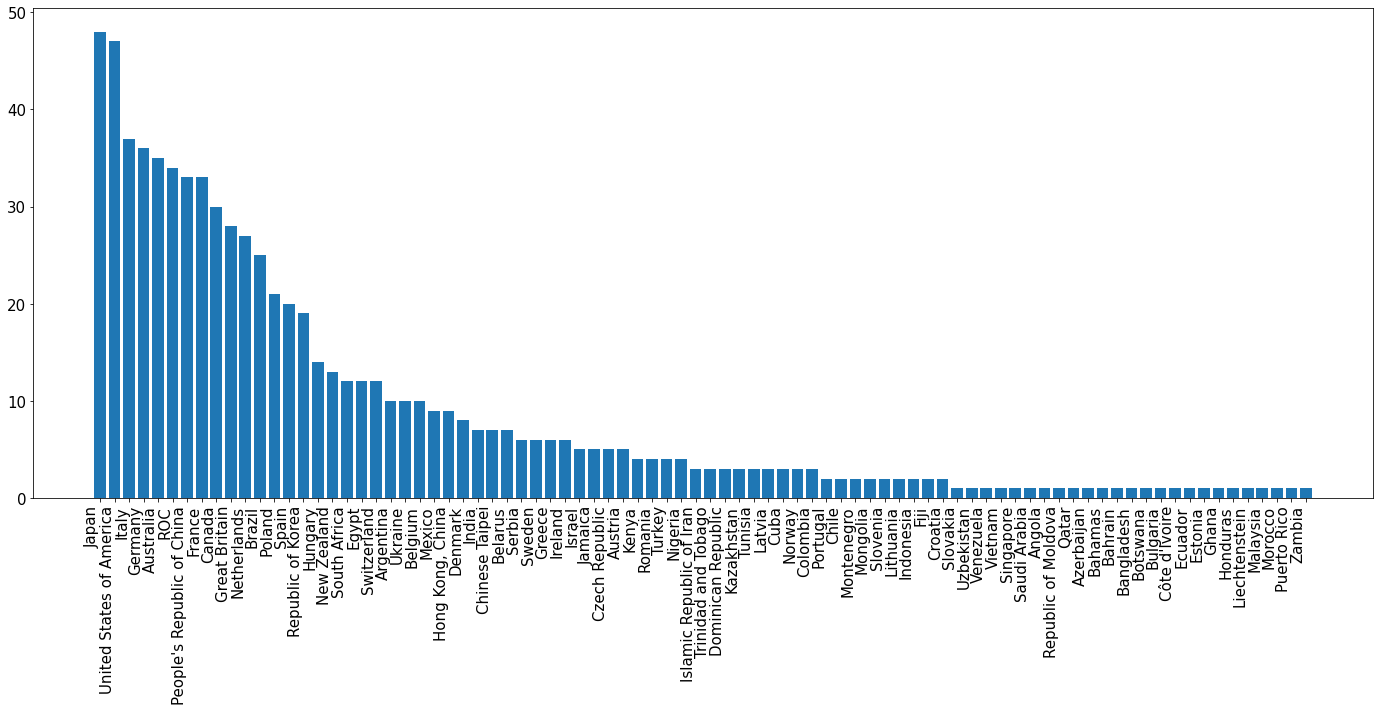

In [82]:
datay = teams.groupby('NOC',as_index=False)['Discipline'].count().sort_values('Discipline',ascending=False)['Discipline'].tolist()
datax = teams.groupby('NOC',as_index=False)['Discipline'].count().sort_values('Discipline',ascending=False)['NOC'].tolist()

fig = plt.figure(figsize=(24,10))
ax = plt.axes()

ax.bar(datax,datay)
fig.autofmt_xdate(rotation='vertical')

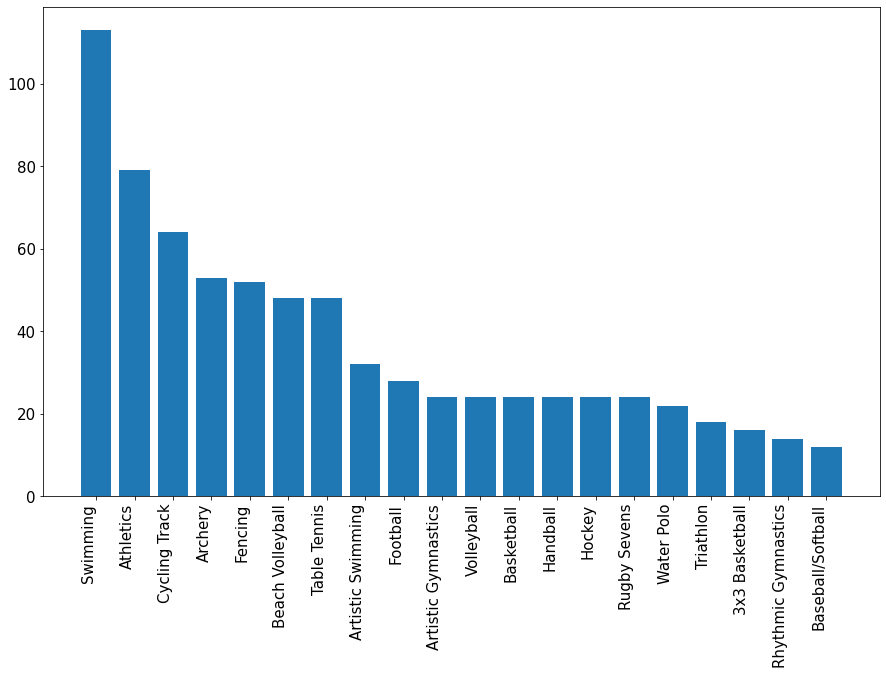

In [85]:
datay = teams.groupby('Discipline',as_index=False)['NOC'].count().sort_values('NOC',ascending=False)['NOC'].tolist()
datax = teams.groupby('Discipline',as_index=False)['NOC'].count().sort_values('NOC',ascending=False)['Discipline'].tolist()

fig = plt.figure(figsize=(15,10))
ax = plt.axes()

ax.bar(datax,datay)
fig.autofmt_xdate(rotation='vertical')

In [109]:
teams.groupby('Name')['NOC'].count()[teams.groupby('Name')['NOC'].count()==teams.groupby('Name')['NOC'].count().max()]

Name
Japan    45
Name: NOC, dtype: int64

In [ ]:
df = df.drop(columns=['Event'])

In [ ]:
df.rename(columns={"NOC": "Name"})

In [110]:
athlets = pd.read_excel('https://raw.githubusercontent.com/wtitze/3E/main/EntriesGender.xlsx')
athlets

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041
5,Badminton,86,87,173
6,Baseball/Softball,90,144,234
7,Basketball,144,144,288
8,Beach Volleyball,48,48,96
9,Boxing,102,187,289


In [112]:
athlets[athlets['Discipline'] == 'Swimming']['Male']

36    418
Name: Male, dtype: int64

In [115]:
athlets[athlets['Female']<100]['Discipline']

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
5,Badminton,86,87,173
6,Baseball/Softball,90,144,234
8,Beach Volleyball,48,48,96
10,Canoe Slalom,41,41,82
12,Cycling BMX Freestyle,10,9,19
13,Cycling BMX Racing,24,24,48
14,Cycling Mountain Bike,38,38,76


In [117]:
athlets['Total'] = athlets['Female'] + athlets['Male']
athlets

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041
5,Badminton,86,87,173
6,Baseball/Softball,90,144,234
7,Basketball,144,144,288
8,Beach Volleyball,48,48,96
9,Boxing,102,187,289


In [149]:
athlets['Total'].sum()

11316

In [122]:
athlets['Percentuale'] = athlets['Total'] * 100 / athlets['Total'].sum()

In [123]:
coaches = pd.read_excel('https://raw.githubusercontent.com/wtitze/3E/main/Coaches.xlsx')
coaches

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN
...,...,...,...,...
389,ZAMORA PEDREIRA Javier,Spain,Basketball,NaN
390,ZAMPIERI Francesca,Liechtenstein,Artistic Swimming,Duet
391,ZHANG Xiaohuan,People's Republic of China,Artistic Swimming,NaN
392,ZIJP Simon,Netherlands,Hockey,NaN


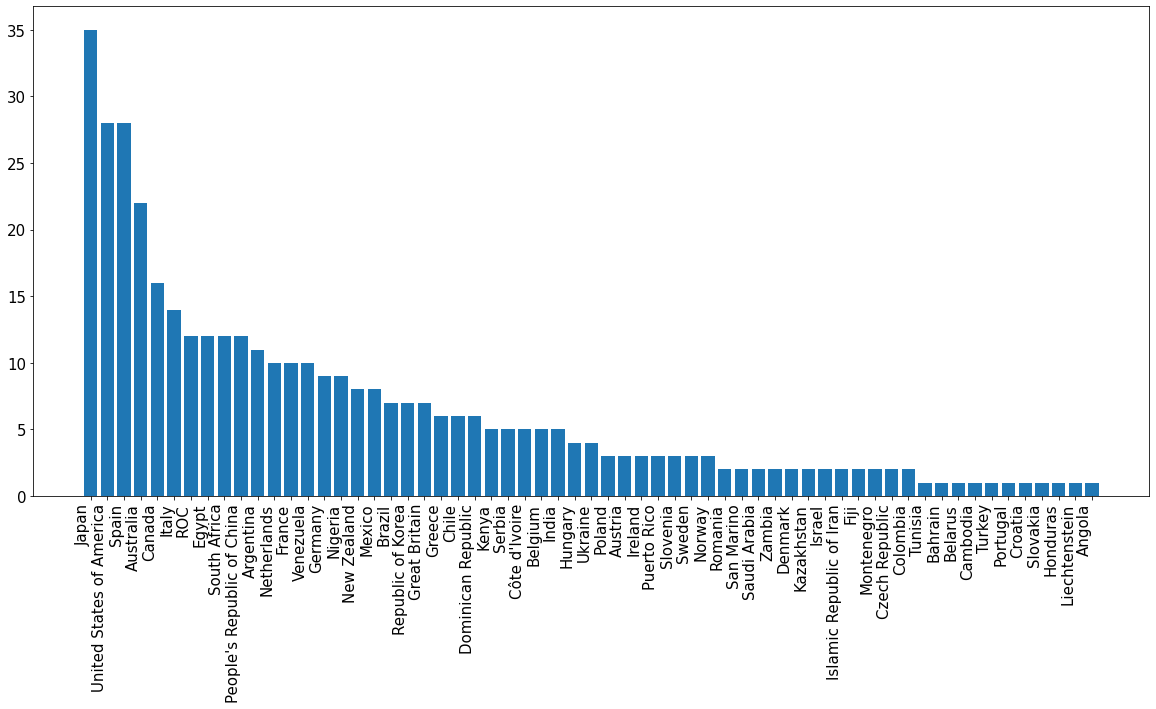

In [135]:
datax = coaches.groupby('NOC',as_index=False)['Name'].count().sort_values('Name',ascending=False)['NOC'].tolist()
datay = coaches.groupby('NOC',as_index=False)['Name'].count().sort_values('Name',ascending=False)['Name'].tolist()

fig = plt.figure(figsize=(20,10))
ax = plt.axes()

ax.bar(datax,datay)
fig.autofmt_xdate(rotation='vertical')

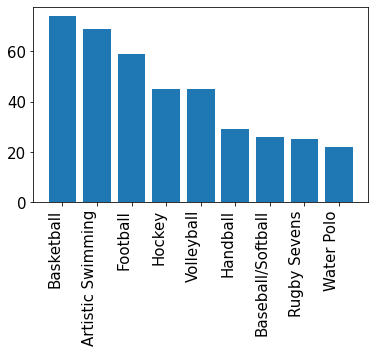

In [136]:
datax = coaches.groupby('Discipline',as_index=False)['Name'].count().sort_values('Name',ascending=False)['Discipline'].tolist()
datay = coaches.groupby('Discipline',as_index=False)['Name'].count().sort_values('Name',ascending=False)['Name'].tolist()

fig = plt.figure()
ax = plt.axes()

ax.bar(datax,datay)
fig.autofmt_xdate(rotation='vertical')

In [138]:
coaches.groupby('NOC')['Name'].count()[coaches.groupby('NOC')['Name'].count()==coaches.groupby('NOC')['Name'].count().max()]

NOC
Japan    35
Name: Name, dtype: int64

In [144]:
coaches.groupby('NOC')['Name'].count()[coaches.groupby('NOC')['Name'].count() > coaches.groupby('NOC')['Name'].count().mean()]

NOC
Argentina                     11
Australia                     22
Brazil                         7
Canada                        16
Egypt                         12
France                        10
Germany                        9
Great Britain                  7
Italy                         14
Japan                         35
Mexico                         8
Netherlands                   10
New Zealand                    8
Nigeria                        9
People's Republic of China    12
ROC                           12
Republic of Korea              7
South Africa                  12
Spain                         28
United States of America      28
Venezuela                     10
Name: Name, dtype: int64

In [146]:
coaches = coaches.drop(columns='Name')

In [147]:
coaches.rename(columns={"NOC": "Name"})

,Name,Discipline,Event
0,Egypt,Football,NaN
1,Japan,Volleyball,NaN
2,Japan,Basketball,NaN
3,Côte d'Ivoire,Football,NaN
4,Japan,Volleyball,NaN
...,...,...,...
389,Spain,Basketball,NaN
390,Liechtenstein,Artistic Swimming,Duet
391,People's Republic of China,Artistic Swimming,NaN
392,Netherlands,Hockey,NaN
